# Decembre 2023


## Bagging (version élèves)


###  On implante notre propre classifieur Bagging pour comprendre le fonctionnement puis on compare à la version de scikit-learn.

### Bagging avec arbre de décision    

#### En cas de besoin, installer les packages suivants

In [29]:
if False :
    !pip install scikit-learn
    !pip install matplotlib
    !pip install visualization


### 1.1) Les données que nous allons utiliser
Nous allons  utiliser des données générées par `make_moons`       


Nous ferons les tests sur un ensemble de données disponible  **make_moon**. Ce Dataset est une des BDs disponibles pour les tests avec **scikit-learn**.    

Dans cette BD, les variables explicatives sont les coordonnées (x,y) en 2D et chaque observation a une classe {0,1} (les 2 `lunes`).

Pour cet exemple, on va générer 300 données **make_moons**.     

### 1.2) Nous allons également scinder les données en un ensemble d'apprentissage et de test.

In [30]:
from sklearn.datasets import make_moons
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score

# Le Dataset généré et découpé en 2 ensembles de train et test.
X, y = make_moons(n_samples=300, noise=.25, random_state=0)
Xtrn, Xtst, ytrn, ytst = train_test_split(X, y, test_size=0.33)

On constate que nous avons découpé nos données en 2 sous ensemble d'apprentissage (66%) et de test (33%)

In [31]:
# tailles des données et quelques exemples de labels
print("taille et dimensions des variables explicatives : ", X.shape)
print("taille et dimensions des classes : ",y.shape)
print("Les 1à premiers labels (classes) : ", y[:10])

taille et dimensions des variables explicatives :  (300, 2)
taille et dimensions des classes :  (300,)
Les 1à premiers labels (classes) :  [1 1 0 1 1 0 1 1 0 0]


In [32]:
# Les 10 premiers exemples de données (2D)
X[:10]

array([[ 0.94073979, -0.71007548],
       [ 0.01729575, -0.32765467],
       [ 0.84365419,  0.73270631],
       [ 1.16362636, -0.47539052],
       [ 0.99462619, -0.24253811],
       [-1.21272339, -0.11551339],
       [ 1.41271254, -0.41404796],
       [ 0.84996754, -0.345203  ],
       [ 0.67101384,  0.72680985],
       [-0.90760785,  0.93114682]])

### 1.3) Plot des données utilisées
Voyons le dataset **make-moons**

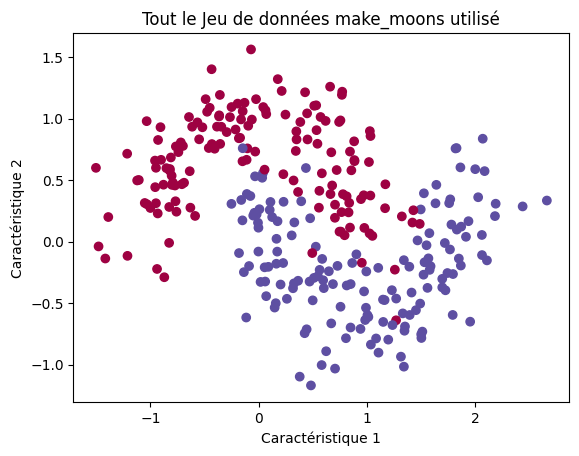

In [33]:
# Plot du jeu de données
import matplotlib.pyplot as plt
plt.scatter(X[:, 0], X[:, 1], c=y, cmap=plt.cm.Spectral)
plt.title("Tout le Jeu de données make_moons utilisé")
plt.xlabel("Caractéristique 1")
plt.ylabel("Caractéristique 2")
plt.show()

On constate que le nuage de données forme deux demi-lunes !

## 2) Préparation de la création de nos modèles 
### 2.1) Fonction d'apprentissage Ensembling
Pour comprendre le Bagging, nous allons créer nous mêmes un ensemble d'arbres de décisions. Plus bas dans ce fichier, nous demanderons à scikitlearn de nous "fabnriquer" un modèle Bagging comparable  à base d'abres de décision.

Pour créer notre Bagging, on écrit 2 fonctions pour réaliser l'apprentissage et la prédiction : 
- `bagging_fit` pour créer le Bagging dont le weak-learner est un arbre de décisions 
- `bagging_predict`  pour réaliser la prédiction sur le modèle collégial Bagging obtenu.

In [34]:
import numpy as np
from sklearn.tree import DecisionTreeClassifier

def bagging_fit(X, y, n_estimators, max_depth=5, max_samples=200):
    n_examples = len(y)   
    #  Créations des estimateurs (aebres)
    estimators = [DecisionTreeClassifier(max_depth=max_depth)  for _ in range(n_estimators)]  
    
    for tree in estimators:
        # Génération de bootstrap  
        bag = np.random.choice(n_examples, max_samples, replace=True)  # Avec remise
        # Fit un arbre avec le'échantillon   bootstrap 
        tree.fit(X[bag, :], y[bag])  
        
    return estimators


La fonction **bagging_fit** renverra une liste d'objets "DecisionTreeClassifier". Remarquez l'échantillonage **avec remise**.      
Nous pouvons utiliser cet ensemble de modèles pour faire des prédictions, en obtenant d’abord les prédictions individuelles, puis en les agrégeant (par vote majoritaire).

### 2.2) La Fonction   de prédiction
Bagging avec un ensemble d'arbres de décision : **Prédiction**

In [35]:
from scipy.stats import mode

def bagging_predict(X, estimators):
    #  Prediction de chaque exemple de test en utilisant chaque arbre  de l'ensemble
    all_predictions = np.array([tree.predict(X) for tree in estimators])  
    # predictions finales avec vote majoritaire 
    ypred, _ = mode(all_predictions, axis=0)  
    return np.squeeze(ypred) # enlève une dimension (flatten) si possible. P. ex [[1,2,3]] devient [1,2,3]

### 2.3) Apprentissage et test sur nos données

Nous formons un ensemble de 500 arbres de décision, chacun de profondeur maxi 12 sur des échantillons bootstrap de taille 200.

C'est à dire : construire 500 arbres de décisions avec pour chacun un échantillon (avec remise) de données de taille 200. Ces arbres auront un eprofondeur maxi de 12 niveau.
#### Utilisation de nos deux fonctions pour l'apprentissage et test

In [36]:
# Apprentissage
bag_ens = bagging_fit(Xtrn, ytrn, n_estimators=500, max_depth=12, max_samples=200)

# Prédiction
ypred = bagging_predict(Xtst, bag_ens)

# Evaluation
print(accuracy_score(ytst, ypred))

0.9393939393939394


Notez que ce score peut changer d'une exécution à une autres et ce à cause de l'aspects aléatoires dans la construction des modèles.

## 3) Comparaison de notre modèle Ensembling et d'un simple arbre de décision
#### On va comparer les performances d'un seul AD avec notre bagging

### 3.1) Construction d'un seul arbre de décision (pour comparaison avec notre Bagging)

In [37]:
# Création d'un seul AD de profondeur max 12
tree = DecisionTreeClassifier(max_depth=12)
ypred_single = tree.fit(Xtrn, ytrn).predict(Xtst)
treeAcc = accuracy_score(ytst, ypred_single)
print('Single Decision Tree: Holdout test accuracy = {0:4.2f}%.'.format(treeAcc * 100))

Single Decision Tree: Holdout test accuracy = 90.91%.


### 3.2) Comparaison à notre Bagging

In [38]:
ensembleAcc = accuracy_score(ytst, ypred)
print('Bagging: Holdout accuracy = {0:4.2f}%.'.format(ensembleAcc * 100))

Bagging: Holdout accuracy = 93.94%.


On constate que notre Bagging a une `meilleure justesse` (par la méthode de test **HoldOut** : test sur un ensemble de test)

Visualisons la différence entre un seul arbre de décision et notre bagging.

#### N.B. : Pour les plots, vous pouvez en apprendre plus via les exemples suivants :
- https://datafiction.github.io/docs/ml/Clustering/Comparison/Comparison/
- https://scikit-learn.org/stable/auto_examples/classification/plot_classifier_comparison.html#sphx-glr-auto-examples-classification-plot-classifier-comparison-py

### 3.3) Une fonction pour de ploter les données  
##### N.B. :  plus haut, on avait ploté plus simplement !

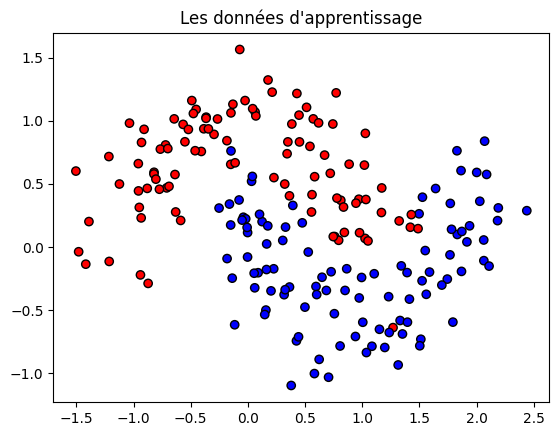

In [39]:
# JE fais une fonction 
# voir aussi ci-dessus pour un plot simple des données de départ
# Ici, une fonction de plot des données d'apprentissage
%matplotlib inline
from matplotlib.colors import ListedColormap
def my_plot_2d_input_training_data(X_train,  y_train) :
    #figure = plt.figure(figsize=(7, 7))
    #datasets=X_train,  y_train

    # le plot du training dataset  
    cm = plt.cm.RdBu
    cm_bright = ListedColormap(["#FF0000", "#0000FF"])

    # Ce plot a une ligne, une col et c'est la 1er figure 
    ax = plt.subplot(1,1, 1) # Si on met (1,2,1), on aura 2 place et on peut dessiner une seule figure à gauche !. !! 
    ax.set_title("Les données d'apprentissage")#
    ax.scatter(X_train[:, 0], X_train[:, 1], c=y_train, cmap=cm_bright, edgecolors="k")

my_plot_2d_input_training_data(Xtrn, ytrn)

### 3.4) Une fonction pour ploter un arbre de décision simple
N.B. : le paramètre classifieur doit être un classifieur de scikit-learn, pas notre modèle collégial Ensembling

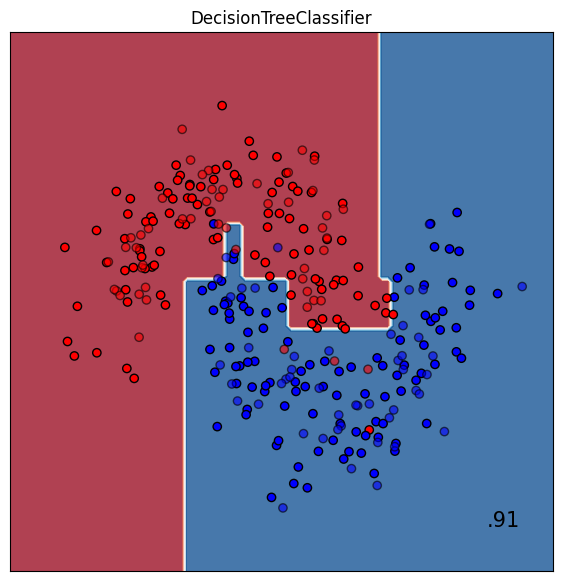

In [40]:
%matplotlib inline
from sklearn.inspection import DecisionBoundaryDisplay
def my_plot_2d_classification(classifier, X_train, X_test, y_train, y_test, method_name : str) :
    x_min, x_max = X_train[:, 0].min() - 0.5, X_train[:, 0].max() + 0.5
    y_min, y_max = X_train[:, 1].min() - 0.5, X_train[:, 1].max() + 0.5
        
    cm = plt.cm.RdBu
    cm_bright = ListedColormap(["#FF0000", "#0000FF"])
    
    # Ou alors :
    figure, ax = plt.subplots(nrows=1, ncols=1, figsize=(7, 7))
    ax.set_xlim(x_min, x_max)
    ax.set_ylim(y_min, y_max)
    ax.set_xticks(())
    ax.set_yticks(())

    score = classifier.score(X_test, y_test)
    DecisionBoundaryDisplay.from_estimator(classifier, X, cmap=cm, alpha=0.8, ax=ax, eps=0.5)

    # Plot the training points
    ax.scatter(X_train[:, 0], X_train[:, 1], c=y_train, cmap=cm_bright, edgecolors="k")

    # Plot the testing points
    ax.scatter(X_test[:, 0], X_test[:, 1], c=y_test, cmap=cm_bright, edgecolors="k",alpha=0.6,)

    ax.set_xlim(x_min, x_max)
    ax.set_ylim(y_min, y_max)
    ax.set_xticks(())
    ax.set_yticks(())

    ax.set_title(method_name)

    # On écrit le score
    ax.text(x_max - 0.3, y_min + 0.3, ("%.2f" % score).lstrip("0"), size=15, horizontalalignment="right")

my_plot_2d_classification(tree, Xtrn, Xtst, ytrn, ytst, "DecisionTreeClassifier")


### 3.5) Et le plot de notre modèle (du Bagging)
Notez bien la frontière de décision

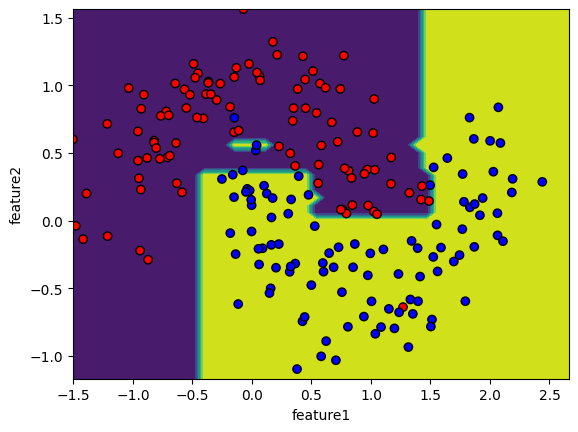

In [41]:
import matplotlib.pyplot as plt
import numpy as np
from sklearn.inspection import DecisionBoundaryDisplay
cm = plt.cm.RdBu
cm_bright = ListedColormap(["#FF0000", "#0000FF"])
feature_1, feature_2 = np.meshgrid(
     np.linspace(X[:, 0].min(), X[:, 0].max()),
     np.linspace(X[:, 1].min(), X[:, 1].max())
)
grid = np.vstack([feature_1.ravel(), feature_2.ravel()]).T
y_pred = np.reshape(bagging_predict(grid,bag_ens), feature_1.shape)
display = DecisionBoundaryDisplay(
     xx0=feature_1, xx1=feature_2, response=y_pred, xlabel="feature1", ylabel="feature2"
)
display.plot()
display.ax_.scatter(Xtrn[:, 0], Xtrn[:, 1], c=ytrn, cmap=cm_bright, edgecolors="k")
plt.show()

### 3.6) Les plots avec `plot_2d_classification` si on peut importer le package !

In [42]:
# Si le package plot_2d_classifier existe (on peut l'importer), on peut avoir les mêmes plots en plus jolis !
# Sinon, tant pius ! On les a ploté plus haut.
%matplotlib inline
try :
    from visualization import plot_2d_classifier
    
    import matplotlib.pyplot as plt
    from visualization import plot_2d_classifier

    fig, ax = plt.subplots(nrows=1, ncols=2, figsize=(8, 4))

    title = 'Single Decision Tree (acc = {0:4.2f}%)'.format(treeAcc*100)
    plot_2d_classifier(ax[0], X, y, colormap='RdBu', alpha=0.3,
                    predict_function=tree.predict,
                    xlabel='$x_1$', ylabel='$x_2$', title=title)

    title = 'Bagging Ensemble (acc = {0:4.2f}%)'.format(ensembleAcc*100)
    plot_2d_classifier(ax[1], X, y, colormap='RdBu', alpha=0.3,
                    predict_function=bagging_predict, predict_args=(bag_ens),
                    xlabel='$x_1$', ylabel='$x_2$', title=title)

    fig.tight_layout()

    #plt.savefig('./fig1.png', format='png', dpi=300, bbox_inches='tight');
except :
    print("Le package plot_2d_classifier n'est pas disponible, passez votre chemin !") 

Le package plot_2d_classifier n'est pas disponible, passez votre chemin !


---
## 4) Bagging avec ``scikit-learn``
Ci-dessus, nous avions fabriqué sur mesure nos 500 estimateurs (arbres) : on a fait notre Bagging "à la main" pour comprendre.     

On va maintenant utiliser le `**BaggingClassifier**` de **scikit-learn** pour former un ensemble de modèles pour la classification. 


Le Bagging de scikit-learn  prend en charge tout types d'estimateurs de base.  Dans l'exemple ci-dessous, nous utilisons un arbre de décision (_DecisionTreeClassifier_) comme estimateur de base (appelé également weak-learner).

### 4.1) Création du modèle collégial

In [43]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import BaggingClassifier

base_estimator = DecisionTreeClassifier(max_depth=10)
bag_ens = BaggingClassifier(base_estimator=base_estimator, n_estimators=500, # `base_estimator` was renamed to `estimator` in version 1.2
                            max_samples=100, oob_score=True)
bag_ens.fit(Xtrn, ytrn)
ypred = bag_ens.predict(Xtst)

/opt/homebrew/lib/python3.11/site-packages/sklearn/ensemble/_base.py:156: FutureWarning: `base_estimator` was renamed to `estimator` in version 1.2 and will be removed in 1.4.
  warnings.warn(


``BaggingClassifier`` accepte une évaluation  **out-of-bag** (oob)  et renverra une  précision "oob" si le paramètre ``oob_score=True`` (cf. ci-dessus).

**Rappel**  avec l'échantillonage bootstrap (avec remise), l'échantillon **out-of-bag** contient tous les données **qui n’ont pas été sélectionnés** lors de l’échantillonnage avec remise. Ainsi, chaque oob est considéré comme une observation "jamais vue".

Pour comparer, on a également un ensemble de tests avec lequel nous pouvons calculer une autre évaluation de ce modèle. 

### 4.2) Le score out-of-bag (oob) du Bagging :
Le score oob est une estimation de la valeur prédictive de l’ensemble d'estimateurs.

In [44]:
bag_ens.oob_score_

0.9502487562189055


### 4.3) Et la justesse du bagging calculé sur l'ensemble de test :
Cette justesse est calculé simplement à partir de l'ensemble de test (tandis que le score **oob** est calculé pendant l'apprentissage).

In [45]:
accuracy_score(ytst, ypred)

0.9393939393939394

Les deux précisions (score de tetst et le score oob sont assez proches).      
Rappelons que nous avons utilisé des arbres de décision de
profondeur maximale 12 comme estimateurs de base. Les arbres de décision plus profonds sont plus complexes.

### 4.4) N.B. : 
Le Bagging est **moins efficace** avec des classificateurs complexes et non linéaires qui ont tendance à trop coller aux données. De tels modèles complexes 
 sont instables, ils sont très sensibles aux petites variations des données d'entraînement.
    
Pour comprendre pourquoi, considérons que les arbres de décision individuels dans un ensemble bagging ont à peu près le même degré de complexité (c-à-d. : le nombre de paramètres / attributs utilisés).
De même, en raison de l'échantillonnage bootstrap, ils ont été formés sur différentes répétitions de l'ensemble de données différents.
En d’autres termes, ils prédisent la même chose  mais à des "endroits" différents de l'espace (domaine $\Omega$) des données.

**La méthode Ensembling** fonctionne mieux avec de tels modèles car  l'agrégation de modèles atténue les erreurs de l'overfitting
des estimateurs de base individuellement simple mais conduisant à un ensemble plus robuste et plus stable.

Nous pouvons visualiser le comportement du ``BaggingClassifier`` en comparant sa frontière de décision à  certaains des arbres de décision.

### 4.5) Le plot du Bagging de ScikitLearn
Le plot les données et le Bagging : remarquez la frontière de décision.

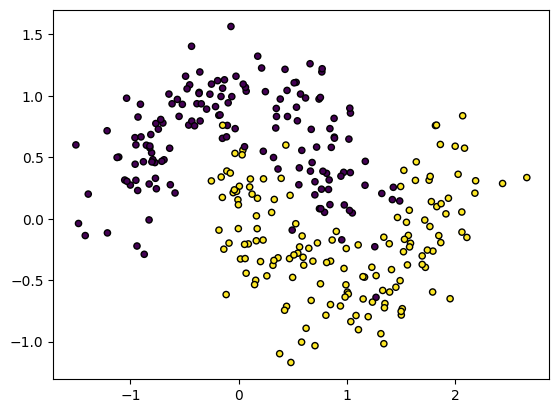

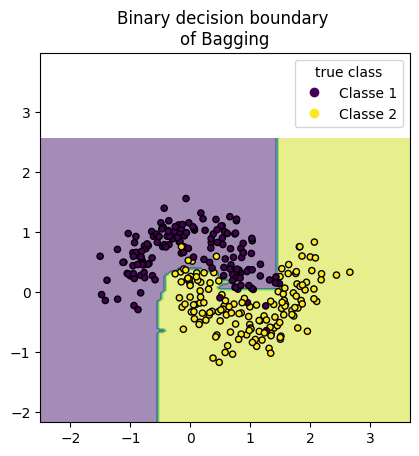

In [46]:
import matplotlib.pyplot as plt

from sklearn.inspection import DecisionBoundaryDisplay
scatter = plt.scatter(X[:, 0], X[:, 1], c=y, s=20, edgecolor="k")
handles, labels = scatter.legend_elements()

disp = DecisionBoundaryDisplay.from_estimator(
    bag_ens,
    X, # Xtrn
    response_method="predict",
    alpha=0.5,
)
disp.ax_.scatter(X[:, 0], X[:, 1], c=y, s=20, edgecolor="k")
disp.ax_.set_title("Binary decision boundary \nof Bagging")
plt.axis("square")
plt.legend(handles=handles, labels=["Classe 1", "Classe 2"], title="true class")
plt.show()

### 4.6) Tentative de créer des plots plus jolis !
Le même problème que ci-dessus avec le package  `plot_2d_classifier`

Si on n'a pas le package, on aura une exception mais si on a le packaage, les plots sont plus lissés !.

In [47]:
%matplotlib inline
try :
    from visualization import plot_2d_classifier
    
    fig, ax = plt.subplots(nrows=2, ncols=3, figsize=(12, 8))
    trees_to_plot = np.random.choice(500, 5, replace=True)

    title = 'Bagging Ensemble (acc = {0:4.2f}%)'.format(accuracy_score(ytst, ypred)*100)
    plot_2d_classifier(ax[0, 0], X, y, colormap='RdBu', alpha=0.3,
                    predict_function=bag_ens.predict, 
                    xlabel='$x_1$', ylabel='$x_2$', title=title)

    for i in range(5):
        r, c = np.divmod(i + 1, 3)  # Get the row and column index of the subplot
        j = trees_to_plot[i]
        
        tst_acc_clf = accuracy_score(ytst, bag_ens[j].predict(Xtst))
        
        bag = bag_ens.estimators_samples_[j] 
        X_bag = X[bag, :]
        y_bag = y[bag]
        
        title = 'Decision Tree {1} (acc = {0:4.2f}%)'.format(tst_acc_clf*100, j+1)
        plot_2d_classifier(ax[r, c], X, y, colormap='RdBu', alpha=0.3,
                        predict_function=bag_ens[j].predict, 
                        xlabel='$x_1$', ylabel='$x_2$', title=title)

    fig.tight_layout()
    # plt.savefig('./fig2.png', format='png', dpi=300, bbox_inches='tight');
except :
    print("Le package plot_2d_classifier n'est pas disponible, passez votre chemin !") 

Le package plot_2d_classifier n'est pas disponible, passez votre chemin !


---
### 4.7) Bagging support le traitement parallèle.
A titre d'exemple, voici une comparaison des deux : un Bagging parallèle et un Bagging séquentiel pour le dataset ci-dessus.

<div style="text-align:center"><img src="./comparaison-Bagging-seq-plle.png" /></div>.



## 5) Random Forest
Les RandomForests représentent la méthode la plus utilisée en Ensembling / Bagging.

**La différence entre Bagging et RandomForest** : 

Rappelons que dans le cas de notre propre Bagging (ci-dessus) ainsi que dans le cas de la méthode Bagging fournie par Scikit-Learn, le **weak-leaner aurait pu être quelconque**, même si nous avons choisi d'utiliser des arbres de décisions. Ainsi, nous aurions pu par exemple choisir une méthode de régression comme weak-learner.

Les randomForests quant à elles ne peuvent pas produire autre chose qu'une collection d'arbres de décision (de classification). En présence d'un problème de régression, nous pouvons utiliser la méthode 
``scikit-learn``'s [``RandomForestRegressor``](https://scikit-learn.org/stable/modules/generated/sklearn.ensemble.RandomForestClassifier.html).

Nous utilisons ici ``scikit-learn``'s [``RandomForestClassifier``](https://scikit-learn.org/stable/modules/generated/sklearn.ensemble.RandomForestRegressor.html).


In [48]:
from sklearn.ensemble import RandomForestClassifier

# Control de la complexité des ADs (nbr, profondeur), avec test "out-of-bag", et "n_jobs=-1" veut dire : paralléliser si possible.
rf_ens = RandomForestClassifier(n_estimators=500, max_depth=10, oob_score=True, n_jobs=-1)
rf_ens.fit(Xtrn, ytrn)
ypred = rf_ens.predict(Xtst)
rf_ens.oob_score_

0.945273631840796

Notons le score oob du RandomForest.

N.B. : Notons que les arbres de décision obtenus lors de la création du RandomForest sont des **RandomizedTrees**.
     
Voir aussi https://scikit-learn.org/stable/modules/generated/sklearn.ensemble.RandomTreesEmbedding.html

## 6) Comparaison des performances du RandomForest et les abres individuels (RandomTrees) de la forêt obtenue..

### 6.1) Le plot du Random forest
On a d'abord le plot des données puis la frontière de décision du Random Forest.

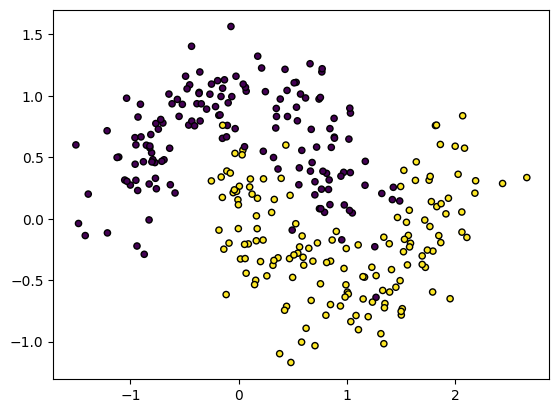

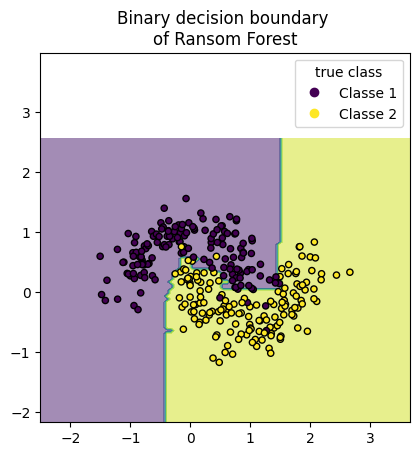

In [49]:
import matplotlib.pyplot as plt

from sklearn.inspection import DecisionBoundaryDisplay
scatter = plt.scatter(X[:, 0], X[:, 1], c=y, s=20, edgecolor="k")
handles, labels = scatter.legend_elements()

disp = DecisionBoundaryDisplay.from_estimator(
    rf_ens,
    X, # Xtrn
    response_method="predict",
    alpha=0.5,
)
disp.ax_.scatter(X[:, 0], X[:, 1], c=y, s=20, edgecolor="k")
disp.ax_.set_title("Binary decision boundary \nof Ransom Forest")
plt.axis("square")
plt.legend(handles=handles, labels=["Classe 1", "Classe 2"], title="true class")
plt.show()

### 6.2) Le premier arbre de décision (parmi les 500 arbres) créé dans le Random Forest :

[Text(0.5735294117647058, 0.9375, 'feat2 <= 0.374\ngini = 0.498\nsamples = 129\nvalue = [94, 107]\nclass = classe 2'),
 Text(0.2647058823529412, 0.8125, 'feat2 <= -0.145\ngini = 0.35\nsamples = 77\nvalue = [28, 96]\nclass = classe 2'),
 Text(0.11764705882352941, 0.6875, 'feat 1 <= 1.25\ngini = 0.061\nsamples = 38\nvalue = [2, 62]\nclass = classe 2'),
 Text(0.058823529411764705, 0.5625, 'gini = 0.0\nsamples = 25\nvalue = [0, 38]\nclass = classe 2'),
 Text(0.17647058823529413, 0.5625, 'feat 1 <= 1.3\ngini = 0.142\nsamples = 13\nvalue = [2, 24]\nclass = classe 2'),
 Text(0.11764705882352941, 0.4375, 'gini = 0.0\nsamples = 1\nvalue = [2, 0]\nclass = classe 1'),
 Text(0.23529411764705882, 0.4375, 'gini = 0.0\nsamples = 12\nvalue = [0, 24]\nclass = classe 2'),
 Text(0.4117647058823529, 0.6875, 'feat 1 <= -0.385\ngini = 0.491\nsamples = 39\nvalue = [26, 34]\nclass = classe 2'),
 Text(0.35294117647058826, 0.5625, 'gini = 0.0\nsamples = 8\nvalue = [15, 0]\nclass = classe 1'),
 Text(0.4705882352

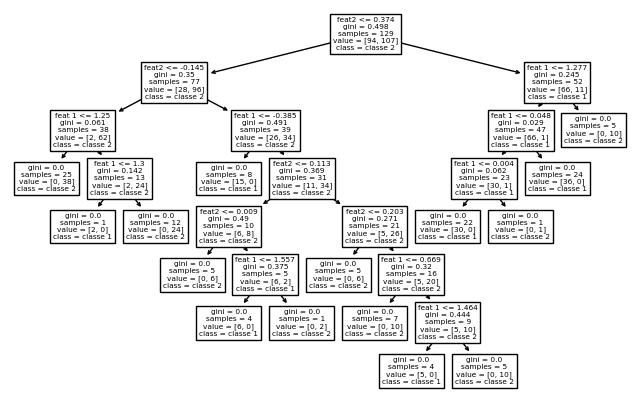

In [50]:
from sklearn.datasets import load_iris
from sklearn.ensemble import RandomForestClassifier
from sklearn import tree
import matplotlib.pyplot as plt
import re
import matplotlib

fig, ax = plt.subplots(figsize=(8,5))

tree.plot_tree(rf_ens.estimators_[0],ax=ax,
feature_names= ["feat 1", "feat2"], class_names=["classe 1", "classe 2"]
)


### 6.3) Les plots des deux premier arbres de décision (parmi les 500 arbres) créé dans le Random Forest :

Vous pouvez accéder à chacun de ces arbres via **rf_ens[i]**

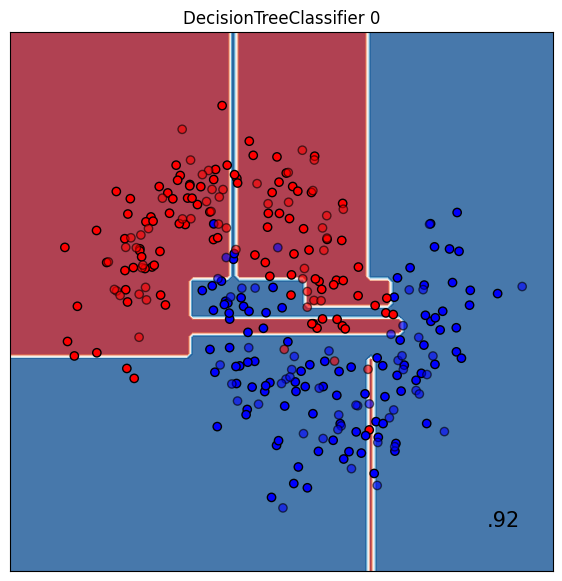

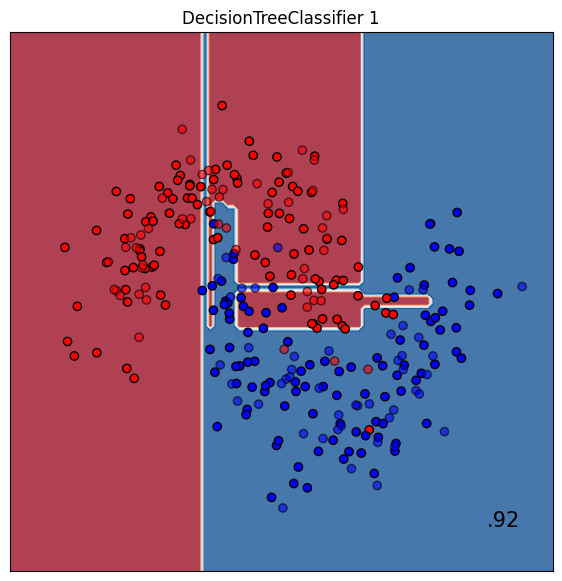

In [51]:

my_plot_2d_classification(rf_ens[0], Xtrn, Xtst, ytrn, ytst, "DecisionTreeClassifier 0")
my_plot_2d_classification(rf_ens[1], Xtrn, Xtst, ytrn, ytst, "DecisionTreeClassifier 1")

### 6.3) Encore une fois le même problème du package (vu ci-dessus) :

In [52]:
%matplotlib inline
try :
    from visualization import plot_2d_classifier

    fig, ax = plt.subplots(nrows=2, ncols=3, figsize=(12, 8))
    trees_to_plot = np.random.choice(500, 5, replace=True)

    title = 'Bagging Ensemble (acc = {0:4.2f}%)'.format(accuracy_score(ytst, ypred)*100)
    plot_2d_classifier(ax[0, 0], X, y, colormap='RdBu', alpha=0.3,
                    predict_function=bag_ens.predict, 
                    xlabel='$x_1$', ylabel='$x_2$', title=title)

    for i in range(5):
        r, c = np.divmod(i + 1, 3)  # Get the row and column index of the subplot
        j = trees_to_plot[i]
        
        tst_acc_clf = accuracy_score(ytst, bag_ens[j].predict(Xtst))
        
        bag = bag_ens.estimators_samples_[j] 
        X_bag = X[bag, :]
        y_bag = y[bag]
        
        title = 'Decision Tree {1} (acc = {0:4.2f}%)'.format(tst_acc_clf*100, j+1)
        plot_2d_classifier(ax[r, c], X, y, colormap='RdBu', alpha=0.3,
                        predict_function=bag_ens[j].predict, 
                        xlabel='$x_1$', ylabel='$x_2$', title=title)

    fig.tight_layout()
    # plt.savefig('./fig2.png', format='png', dpi=300, bbox_inches='tight');
except :
    print("Le package plot_2d_classifier n'est pas disponible, passez votre chemin !") 

Le package plot_2d_classifier n'est pas disponible, passez votre chemin !


---
## 7) Feature Importance et sélection d'attributs

L’un des avantages de l’utilisation des RandomForests est qu’ils fournissent également un mécanisme naturel de choix d'attributs (**feature selection**)   en fonction de leur importance.      
Cela signifie que nous pouvons classer les attributs pour identifier les plus
 importants et supprimez ceux à faible impact, effectuant ainsi la sélection des attributs !
 
La **Feature selection** ou la sélection d'attributs, également connue sous le nom de **variable subset selection**   est la procédure d'identification des caractéristiques / attributs les plus efficaces.

La sélection des attributs est une étape importante du processus de modélisation, en particulier pour les datasets de grandes dimension (avec beaucoup d'attributs).

La suppression des variables explicatives les moins pertinentes améliore souvent les performances des modèles et minimise le surapprentissage et donc la vitesse de calcul des modèles.

Ces problèmes sont les conséquences de ce que l'on appelle **la malédiction de la dimensionnalité** (_curse of dimensionality_)
où le grand nombre de variables prédictives inhibe la capacité du modèle à généraliser efficacement.

Pour en savoir plus, voir le livre "The Art of Feature Engineering: Essentials for Machine Learning" par Pablo Duboue pour en savoir plus.

### 7.1) Importance des attributs dans RandomForestClassifier
**RandomForestClassifier** de scikit-learn peut également classer les attributs (features) en fonction de leur importance. 

Le calcul du **Feature Importance** (importance de caractéristique / attribut) peut être extrait de l'attribut **feature_importances_** 
du modèle RandomForest construit et appris. 

Ce calcul est fait en additionnant la mesure dans laquelle chaque caractéristique diminue le critère global d'impureté de **Gini** pendant l'apprentissage.
Les attributs qui diminuent davantage l’impureté auront une importance plus élevée.

### 7.2) Un exemple sur le RandomForest construit ci-dessus : quelle est l'importance de chaque caractéristique des données utilisées ci-dessus :

In [53]:
for i, score in enumerate(rf_ens.feature_importances_):
    print('Feature x{0}: {1:6.5f}'.format(i, score))

Feature x0: 0.45912
Feature x1: 0.54088


Les scores des attributs pour notre dataset (2D, simple) suggèrent que les deux caractéristiques sont
à peu près tout aussi important. 

Notez que la somme de ces "importances" = 1.

**Intérêt** : Lorsque certains attributs ont une importance basse, on peut les ignorer sans affecter de manière significative la qualité du modèle obtenu, tout en améliorant les temps de calculs. De plus, le choix des meilleurs attributs est un outil de réduction de la dimension.

---
### 7.3) A propos de la Randomisation (voir cours 8) et les RandomTrees.

### 7.3.1) Ransomisation des attributs
Les Randomforest **peuvent utiliser** (voir ci-dessous) un algorithme d'apprentissage d'arbre de décision (ou de régression) modifié, dans lequel un **sous-ensemble aléatoires d'attributs** est d'abord
choisi avant que le meilleur critère de fractionnement pour chaque noeud de décision soit identifié désignant le meilleur attribut parmi ceux retenus.

<div style="text-align:center"><img src="./randomisation.png" /></div>.

Il est possible de rendre les modèles de base (weak learners) encore plus diversifiés en échantillonnant aléatoirement les attributs.

Au lieu d'échantillonner des observations, si nous générons des sous-ensembles en échantillonnant des attributs
(avec ou sans remplacement), on obtient une variante de bagging appelée **Random Subspaces**.

Le "BaggingClassifier" de Scikit-learn  prend en charge l'échantillonnage bootstrap des attributs via deux paramètres :
- `bootstrap_features` (par défaut : False) et 
- `max_features` (par défaut : 1.0 = toutes les attributs),
     
qui sont analogues aux paramètres bootstrap (par défaut : False) et "max_samples" pour  l’échantillonnage.

Par exemple : 

In [54]:
from sklearn.svm import SVC
bag_ens = BaggingClassifier(
    base_estimator=SVC(), n_estimators=100,
    max_samples=1.0, bootstrap=False,       # utiliser toutes les instances
    max_features=0.5, bootstrap_features=True) # Bootstrap des 50% des attributs

## 8) Bagging, Random subspaces et  Random patches 

Si nous échantillonnons de manière aléatoire à la fois des observations et des attributs (avec ou sans remplacement), nous
obtenons une variante d'Ensembling appelée **Random Patches**.

Les différentes combinaisons possibles :  comparaison **Bagging**,  **random subspaces** et **random patches**
    
<div style="text-align:center"><img src="./feature-selection-in-bagging.png" /></div>.

    

In [55]:
from sklearn.svm import SVC
bag_ens = BaggingClassifier(
    base_estimator=SVC(), n_estimators=100,
    max_samples=0.75, bootstrap=True,           # Bootstrap du 75% des instances
    max_features=0.5, bootstrap_features=True) # Bootstrap de 50% des attributs


## 9) Bagging et Pasting
Le Bagging utilise un échantillonnage bootstrap  avec remplacement. Si, au contraire, nous échantillonnons
sous-ensembles d'apprentissage **sans remplacement**, nous disposons d'une variante de bagging connue sous le nom de **pasting**.

Le Pasting est utilisé lorsqu'on dispose d'un grand dataset où l'échantillonage d'une partie des données sans remplacement peut remplir le même rôle
que l'échantillonage avec remplacement dans un dataset de taille normale.

Pour réaliser un **pasting**, on peut utiliser pour "BaggingClassifier" les paramètres **bootstrap=False** et en choisissant un petit sous ensemble de données
via  **max_samples=0.05**.        

### 9.1) Liens avec Big Data :
En pratique, ces variantes de bagging peuvent être particulièrement efficaces pour le **Big Data**. 

Par exemple, puisque les _random subspaces_ et  _random patches_ échantillonnent les attributs, ils peuvent être utilisés pour former plus efficacement les estimateurs de base pour les données comportant de nombreuses attributs, telles que les données d'image (_Image Mining_).

Alternativement, avec **pasting** (échantillonage d'une partie des données sans remplacement), on peut entrainer des estimateurs de base plus efficacement en présence d'une grande base de données avec beaucoup d'instances.

###  9.2) Différences entre Random Forest,  Random subspace  et Random patchs :
<font color="red"> La principale différence entre les **random forests** et **random subspace** et **random patchs** </font> est sur l'échantillonage des attributs (et les **weak-lerners**).

- Les **random forests**  utilisent <font color="red"> exclusivement </font> des arbres de décision randomisés comme estimateurs de base. Plus précisément, ils effectuent un échantillonnage  d'attributs  **à l'intérieur** de l'algorithme d'apprentissage de l'arbre à chaque fois qu'ils développent l'arbre avec un nœud de décision. 
     
- En revanche, les **random subspace** et les et **random patchs**  ne se limitent pas à l'apprentissage des **arbres de décision** et peuvent utiliser n'importe quel algorithme d'apprentissage comme estimateur de base.      
Ils échantillonnent les attributs au hasard en les préparant **à l'extérieur**, c-à-d. **avant d'appeler l'algorithme d'apprentissage de base** pour chaque estimateur de base.

### Pour résumer : 
- **Random forest** : échantillonage avec remise, échantillonage caché (interne à l'algorithme) d'attrinbuts, weak-lerner = arbre de décision
- **random subspace**/ **random patchs** : échantillonage avec remise, échantillonage d'attrinbuts au préalable (à l'algorithme), weak-lerner quelconque.

Dans les 2 cas, comme nous l'avons vu, l'échantillonage peut être décidé sans remise (**pasting**) si Big Data.


### 9.3) ExtraTress
Lors de la construction d'un arbre de classification / régression, nous créeons un noeud en plaçant un test de la forme $x_i < v$. La valeur $v$ dépend des données (dépend des valeurs de l'attribut $x_i$).

<font color="red"> Lorsque la valeur</font> $v$ <font color="red"> devient un seuil **aléatoire**, l'arbre construit est appelé **ExtraTree**.</font>

Cette randomisation extrême est si efficace, en fait, que nous pouvons construire un ensemble de
arbres extrêmement aléatoires directement à partir de l'ensemble de données d'origine sans échantillonnage bootstrap !
Cela signifie que nous pouvons construire un ensemble ExtraTrees très efficacement.

<u>Utilisation en BigData </u>: **En pratique, les ensembles ExtraTrees conviennent bien aux ensembles de données de grande dimension comportant un grand nombre de données et d'attibuts
continues.**

### 9.4) **ATTANTION** :   scikit-learn fournit deux classes très similaires :
- **sklearn.tree.ExtraTreeClassifier** 
- **sklearn.ensemble.ExtraTreesClassifier**
 
**sklearn.tree.ExtraTreeClassifier**  diffèrent des arbres de décision classiques par la manière dont ils sont construits. Lors de la recherche de la meilleure répartition pour séparer les échantillons d'un nœud en deux groupes, des **répartitions aléatoires** sont tirées pour chacune des attributs  (pami **max_features**) sélectionnées **au hasard** et la meilleure répartition parmi celles-ci est choisie. Lorsque max_features = 1, cela revient à construire un arbre de décision totalement aléatoire.  
   
 <font color="red"> Attention </font> : Tout comme pour le meta-learner **sklearn.ensemble.RandomForest**, les **sklearn.tree.ExtraTreeClassifier** ne doivent être utilisés que dans les méthodes d'ensemble en tant que weak-learnere


**sklearn.ensemble.ExtraTreesClassifier**  implémente un méta-estimateur qui construit un certain nombre d'arbres de décision randomisés (a.k.a. extraTrees) sur divers sous-échantillons de l'ensemble de données et utilise la moyenne pour améliorer la précision prédictive et contrôler le over-fitting.    

Ainsi, dans le cas de **sklearn.ensemble.ExtraTreesClassifier**, il n'y a pas lieu de préciser un weak-leaner car le résultat est en soi un méta-leaner.

### 9.5) Exemple appliqué à nos données :

**ExtraTreeClassifier** comme weak-leaner du Bagging :

In [59]:
# Exemple de sklearn.tree.ExtraTreesClassifier
from sklearn.datasets import load_iris
from sklearn.model_selection import train_test_split
from sklearn.ensemble import BaggingClassifier
from sklearn.tree import ExtraTreeClassifier

extra_tree = ExtraTreeClassifier(random_state=0)
cls = BaggingClassifier(extra_tree, random_state=0).fit(Xtrn, ytrn)  # << -- Ici, tree.ExtraTreesClassifier est un weak-learner paramètre de Bagging.
cls.score(Xtst, ytst)
# 0.8947...

0.9494949494949495

**ExtraTreesClassifier** comme méta-learner (donc sans weak-learner)

In [ ]:
# Exemple de sklearn.ensemble.ExtraTreesClassifier
from sklearn.ensemble import ExtraTreesClassifier
from sklearn.datasets import make_classification
#X, y = make_classification(n_features=4, random_state=0)

clf = ExtraTreesClassifier(n_estimators=100, random_state=0)  # <<-- Donc pas de weak-learner à préciser. Ce sera une forêt d'arbres de décision.

clf.fit(X, y)
# Exemple de prédiction
print("La classe de [0,0] = ", clf.predict([[0, 0]]))
# array([1])
clf.score(Xtst, ytst)  # Le score sur l'ensemble de test

La classe de [0,0] =  [1]


0.9191919191919192